In [6]:
import pandas as pd

# Step 0.2: Matplotlib import kar rahe hain
# Matplotlib basic plotting ke liye use hota hai
import matplotlib.pyplot as plt

# Step 0.3: Seaborn import kar rahe hain
# Seaborn advanced statistical plots ke liye use hota hai
import seaborn as sns

In [7]:
df = pd.read_excel(
    r"C:\Users\vaiva\OneDrive\Desktop\RD-INFRO-DATA-SCIENCE\Dataset\Telco_customer_churn.xlsx"
)
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


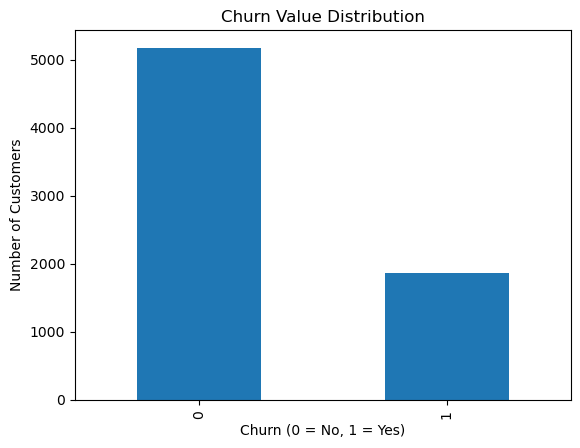

In [10]:
# Step 2.1: Target variable ka distribution dekh rahe hain
df["Churn Value"].value_counts().plot(kind="bar")
plt.title("Churn Value Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

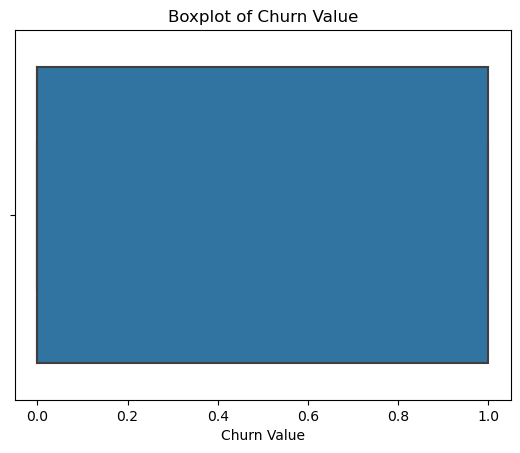

In [11]:
# Step 3.1: Boxplot bana rahe hain for target variable
# Ye outliers aur spread samajhne mein help karta hai
sns.boxplot(x=df["Churn Value"])
plt.title("Boxplot of Churn Value")
plt.show()

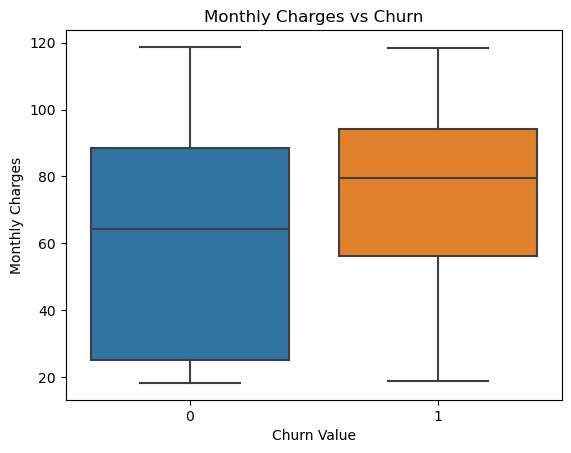

In [12]:
# Step 4.1: Monthly Charges ka churn ke saath relation
sns.boxplot(x="Churn Value", y="Monthly Charges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

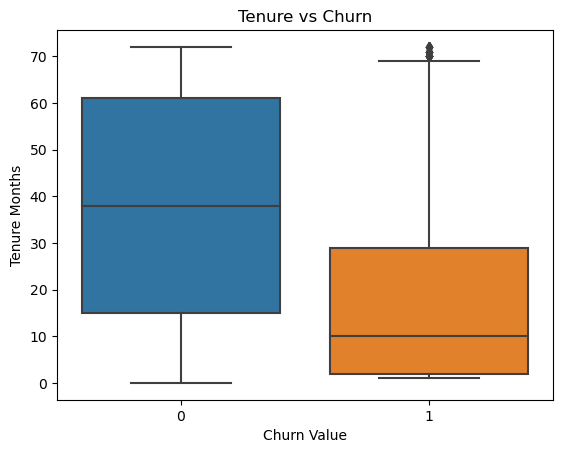

In [13]:
# Step 4.2: Tenure ka churn ke saath relation
sns.boxplot(x="Churn Value", y="Tenure Months", data=df)
plt.title("Tenure vs Churn")
plt.show()

In [14]:
# Step 5.1: Sirf numeric columns select kar rahe hain
numeric_df = df.select_dtypes(include="number")

In [15]:
# Step 5.2: Correlation matrix calculate kar rahe hain
correlation_matrix = numeric_df.corr()

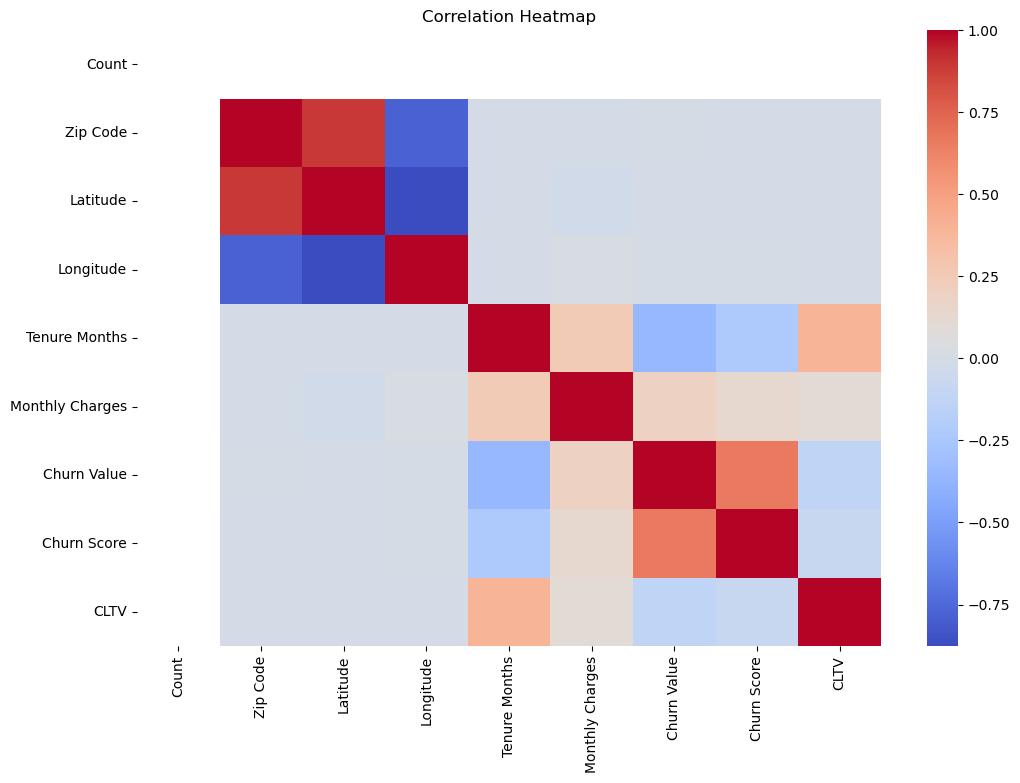

In [16]:
# Step 5.3: Heatmap plot kar rahe hain
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=False,        # values hide rakhe taaki graph clean rahe
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()

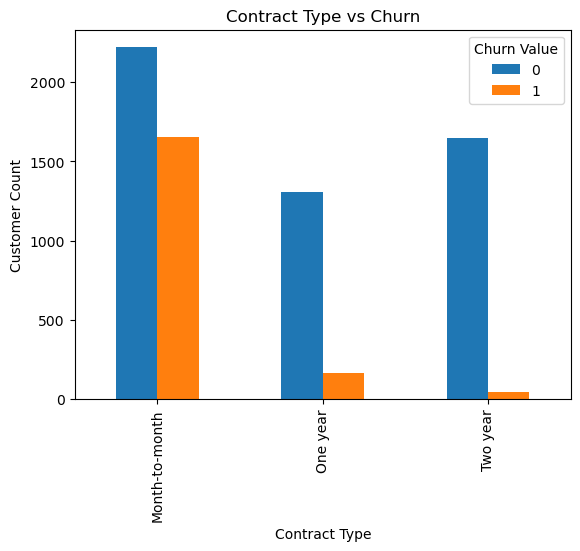

In [17]:
# Step 6.1: Contract type ka churn pe impact
pd.crosstab(df["Contract"], df["Churn Value"]).plot(kind="bar")
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.show()